In [2]:
import os
import sys
import re
import shutil
import time
import pickle
from collections import defaultdict
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from helper.fetchlib import fetch_ts, fetch_data

In [3]:
run_start = time.time() 
data_dir = os.path.join(".","data","cs-train")
print("...fetching data")

ts_all = fetch_ts(data_dir,clean=False)

m, s = divmod(time.time()-run_start,60)
h, m = divmod(m, 60)
print("load time:", "%d:%02d:%02d"%(h, m, s))
frames = []
for key,item in ts_all.items():
    if key !='all':
        print(key,item.shape)
        item['country'] = key
    
        frames.append(item)
result = pd.concat(frames)

year = result['year_month'].apply(lambda x: x.split('-')[0])
result['year'] = year

...fetching data
... loading ts data from files
load time: 0:00:00
portugal (607, 7)
united_kingdom (607, 7)
hong_kong (426, 7)
eire (607, 7)
spain (607, 7)
france (607, 7)
singapore (456, 7)
norway (577, 7)
germany (607, 7)
netherlands (607, 7)


In [4]:
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
result.head()

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue,country,year
0,2017-11-01,0,0,0,0,2017-11,0.0,portugal,2017
1,2017-11-02,0,0,0,0,2017-11,0.0,portugal,2017
2,2017-11-03,0,0,0,0,2017-11,0.0,portugal,2017
3,2017-11-04,0,0,0,0,2017-11,0.0,portugal,2017
4,2017-11-05,0,0,0,0,2017-11,0.0,portugal,2017


In [7]:
print( result.groupby(['country'])['revenue'].sum())

country
eire               104589.400
france              38985.420
germany             45651.261
hong_kong           14393.130
netherlands         12296.780
norway              38326.120
portugal            13327.210
singapore           12945.460
spain               15393.360
united_kingdom    3343551.644
Name: revenue, dtype: float64


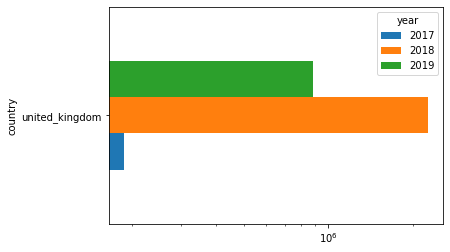

In [8]:
res = result[result['country'] == 'united_kingdom'].groupby(['country','year'])['revenue'].sum().unstack()
ax = res.plot.barh()
ax.set_xscale("log")

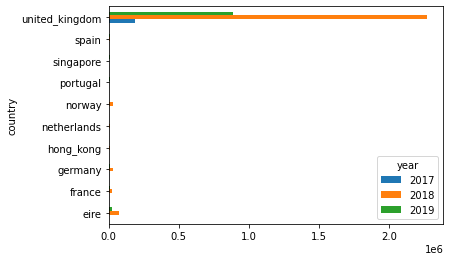

In [6]:
r2 = result.groupby(['country','year'])['revenue'].sum().unstack()
ax2 = r2.plot.barh()
# scale x normal

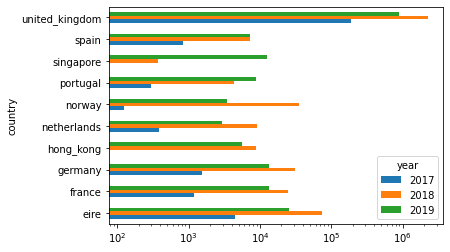

In [41]:
ax3 = r2.plot.barh()
ax3.set_xscale("log")

#scale x logarythm